In [1]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [ ]:
'''
code to retrieve and store dataset in Gdrive
from google.colab import files
files.upload()
import os
import shutil
os.makedirs("/root/.kaggle", exist_ok=True)
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 600)
!pip install -q kaggle
!kaggle datasets download -d aryansingh0909/nyt-articles-21m-2000-present
!unzip -q nyt-articles-21m-2000-present.zip -d nyt_data
!cp -r nyt_data /content/drive/MyDrive/nyt_articles/

# Ensure 'year' column is present
df['pub_date'] = pd.to_datetime(df['pub_date'], errors='coerce')
df['year'] = df['pub_date'].dt.year

# Filter for articles from 2010 onwards
df_2010_onward = df[df['year'] >= 2015]

# Optional: Drop rows without a headline
df_2010_onward = df_2010_onward[df_2010_onward['headline'].notnull()]

# Save to CSV in your Google Drive
output_path = '/content/drive/MyDrive/nyt_articles/nyt-2015-onward.csv'
df_2010_onward.to_csv(output_path, index=False)

print(f"✅ Filtered dataset saved to: {output_path}")
print(f"📦 Rows in filtered set: {len(df_2010_onward)}")
'''

'\ncode to retrieve and store dataset in Gdrive\nfrom google.colab import files\nfiles.upload()\nimport os\nimport shutil\nos.makedirs("/root/.kaggle", exist_ok=True)\nshutil.move("kaggle.json", "/root/.kaggle/kaggle.json")\nos.chmod("/root/.kaggle/kaggle.json", 600)\n!pip install -q kaggle\n!kaggle datasets download -d aryansingh0909/nyt-articles-21m-2000-present\n!unzip -q nyt-articles-21m-2000-present.zip -d nyt_data\n!cp -r nyt_data /content/drive/MyDrive/nyt_articles/\n\n# Ensure \'year\' column is present\ndf[\'pub_date\'] = pd.to_datetime(df[\'pub_date\'], errors=\'coerce\')\ndf[\'year\'] = df[\'pub_date\'].dt.year\n\n# Filter for articles from 2010 onwards\ndf_2010_onward = df[df[\'year\'] >= 2015]\n\n# Optional: Drop rows without a headline\ndf_2010_onward = df_2010_onward[df_2010_onward[\'headline\'].notnull()]\n\n# Save to CSV in your Google Drive\noutput_path = \'/content/drive/MyDrive/nyt_articles/nyt-2015-onward.csv\'\ndf_2010_onward.to_csv(output_path, index=False)\n\npr

In [ ]:
import pandas as pd

#file_path = '/content/drive/MyDrive/nyt_articles/nyt_clickbait_labeled1.csv'
#file_path = '/content/drive/MyDrive/nyt_articles/nyt-2015-onward.csv'
file_path = '/content/drive/MyDrive/nyt_articles/nyt-2015-2025.csv'
#file_path = '/content/drive/MyDrive/nyt_articles/nyt-metadata.csv'
df = pd.read_csv(file_path)

#If you want only the clickbait created rows
#df = df[df['clickbait_label'].notna() & df['clickbait_score'].notna()]


print(" Dataset Info:")
print(df.info())

print("\n Sample Rows:")
print(df.head())

print("\n Missing Values per Column:")
print(df.isnull().sum())

print("\n Unique values in some key columns:")
for col in ['section', 'source', 'type_of_material']:
    if col in df.columns:
        print(f"\n {col}:")
        print(df[col].value_counts().head(10))

if 'pub_date' in df.columns:
    df['pub_date'] = pd.to_datetime(df['pub_date'], errors='coerce')
    df['year'] = df['pub_date'].dt.year
    print("\n Articles per Year:")
    print(df['year'].value_counts().sort_index())

/tmp/ipython-input-54-4158712745.py:7: DtypeWarning:

Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.



 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   abstract          109819 non-null  object 
 1   web_url           110000 non-null  object 
 2   snippet           108793 non-null  object 
 3   lead_paragraph    109284 non-null  object 
 4   print_section     65449 non-null   object 
 5   print_page        65440 non-null   object 
 6   source            110000 non-null  object 
 7   multimedia        110000 non-null  object 
 8   headline          110000 non-null  object 
 9   keywords          110000 non-null  object 
 10  pub_date          110000 non-null  object 
 11  document_type     110000 non-null  object 
 12  news_desk         106788 non-null  object 
 13  section_name      109788 non-null  object 
 14  byline            110000 non-null  object 
 15  type_of_material  107206 non-null  object 
 16  _id  

In [ ]:
# import pandas as pd

# # Load metadata and parse year
# nyt_meta_path = '/content/drive/MyDrive/nyt_articles/nyt-metadata.csv'
# df = pd.read_csv(nyt_meta_path)

# # Extract year
# df['pub_date'] = pd.to_datetime(df['pub_date'], errors='coerce')
# df['year'] = df['pub_date'].dt.year

# # Filter and sample per year
# dfs = []
# for yr in range(2015, 2024):
#     df_year = df[df['year'] == yr]
#     sample_size = min(10000, len(df_year))
#     sampled = df_year.sample(n=sample_size, random_state=42)
#     dfs.append(sampled)
#     print(f" {yr}: Sampled {sample_size} from {len(df_year)} available.")

# # Combine and save to CSV
# df_2015_2023 = pd.concat(dfs, ignore_index=True)
# df_2015_2023.to_csv('/content/drive/MyDrive/nyt_articles/nyt_2015_2023.csv', index=False)
# print(" Saved sampled data to nyt_2015_2023.csv")

In [ ]:
# Load all files
df_2015_2023 = pd.read_csv('/content/drive/MyDrive/nyt_articles/nyt_2015_2023.csv')
df_2024 = pd.read_csv('/content/drive/MyDrive/nyt_articles/nyt_articles_2024.csv')
df_2025 = pd.read_csv('/content/drive/MyDrive/nyt_articles/nyt_articles_2025.csv')

# Optional: Add year column if missing
for df_future, year in zip([df_2024, df_2025], [2024, 2025]):
    if 'year' not in df_future.columns:
        df_future['pub_date'] = pd.to_datetime(df_future['pub_date'], errors='coerce')
        df_future['year'] = df_future['pub_date'].dt.year

# Combine and save
full_df = pd.concat([df_2015_2023, df_2024, df_2025], ignore_index=True)
full_df.to_csv('/content/drive/MyDrive/nyt_articles/nyt-2015-2025.csv', index=False)
print(" Merged and saved as nyt-2015-2025.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/nyt_articles/nyt_2015_2023.csv'

In [ ]:

# Convert pub_date to datetime and extract year
df_2015_2023['pub_date'] = pd.to_datetime(df_2015_2023['pub_date'], errors='coerce')
df_2015_2023['year'] = df_2015_2023['pub_date'].dt.year

# Count articles per year
year_counts = df_2015_2023['year'].value_counts().sort_index()

# Display results
print(" Article count per year:")
print(year_counts)

NameError: name 'df_2015_2023' is not defined

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import pandas as pd
import ast

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/nyt_articles/nyt-2015-2025.csv', low_memory=False)
df['headline_main'] = df['headline'].apply(lambda x: ast.literal_eval(x).get('main') if isinstance(x, str) else None)
df = df[df['headline_main'].notnull() & df['lead_paragraph'].notnull()].copy()

# Concatenate text
df['combined_text'] = df['headline_main'] + " " + df['lead_paragraph']

In [ ]:
'''
import pandas as pd
import numpy as np
import ast
from tqdm import tqdm
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

# Load model and tokenizer
model_name = "caush/Clickbait1"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
pipe = pipeline("text-classification", model=model, tokenizer=tokenizer, truncation=True, device=0)

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/nyt_articles/nyt-2015-2025.csv', low_memory=False)

# Parse date
df['pub_date'] = pd.to_datetime(df['pub_date'], errors='coerce')
df['year'] = df['pub_date'].dt.year

# Extract main headline
def extract_headline_main(entry):
    try:
        return ast.literal_eval(entry).get('main', None)
    except:
        return None

df['headline_main'] = df['headline'].apply(extract_headline_main)
df = df[df['headline_main'].notnull() & df['lead_paragraph'].notnull()].copy()

# Token-aware truncation
def truncate_to_fit(headline, lead, max_length=512):
    # Tokenize headline
    headline_tokens = tokenizer.tokenize(headline)
    lead_tokens = tokenizer.tokenize(lead)

    # Truncate lead to fit within max_length
    available_tokens = max_length - len(headline_tokens) - 3  # [CLS], [SEP], [SEP]
    lead_tokens_trunc = lead_tokens[:max(0, available_tokens)]

    # Decode back to string
    return tokenizer.convert_tokens_to_string(headline_tokens + lead_tokens_trunc)

df['combined_text'] = df.apply(lambda row: truncate_to_fit(row['headline_main'], row['lead_paragraph']), axis=1)

# Ensure output columns
if 'clickbait_label' not in df.columns:
    df['clickbait_label'] = pd.Series(dtype='object')
if 'clickbait_score' not in df.columns:
    df['clickbait_score'] = pd.Series(dtype='float64')

# Check pending rows
print("\n Rows per year still needing labeling:")
print(df[df['clickbait_label'].isna()]['year'].value_counts().sort_index())

# Save path
output_path = '/content/drive/MyDrive/nyt_articles/nyt_clickbait_labeled_caush.csv'

# Config
years_to_process = list(range(2025, 2014, -1))
batch_size = 32
f
# Run year-wise
for year in years_to_process:
    print(f"\n Processing year: {year}")
    year_df = df[(df['year'] == year) & (df['clickbait_label'].isna())]

    if year_df.empty:
        print(f" No rows left to process for year {year}.")
        continue

    texts = year_df['combined_text'].tolist()
    valid_indices = []
    results = []

    for i in tqdm(range(0, len(texts), batch_size)):
        batch = texts[i:i + batch_size]
        try:
            preds = pipe(batch)
            results.extend(preds)
            valid_indices.extend(year_df.index[i:i+len(preds)])
        except Exception as e:
            print(f" Error during batch {i}: {e}")
            continue

    # Apply predictions
    df.loc[valid_indices, 'clickbait_label'] = [r['label'] for r in results]
    df.loc[valid_indices, 'clickbait_score'] = [r['score'] for r in results]

    # Save after year
    df.to_csv(output_path, index=False)
    print(f" Saved after year {year} → {output_path}")

    # Example row
    sample_row = df.loc[valid_indices, ['headline_main', 'clickbait_label', 'clickbait_score']].sample(1, random_state=42)
    print("\n Example labeled row:")
    print(sample_row.to_string(index=False))

print("\n All years processed and saved with clickbait labels!")
'''

'\nimport pandas as pd\nimport numpy as np\nimport ast\nfrom tqdm import tqdm\nfrom transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification\n\n# Load model and tokenizer\nmodel_name = "caush/Clickbait1"\ntokenizer = AutoTokenizer.from_pretrained(model_name)\nmodel = AutoModelForSequenceClassification.from_pretrained(model_name)\npipe = pipeline("text-classification", model=model, tokenizer=tokenizer, truncation=True, device=0)\n\n# Load dataset\ndf = pd.read_csv(\'/content/drive/MyDrive/nyt_articles/nyt-2015-2025.csv\', low_memory=False)\n\n# Parse date\ndf[\'pub_date\'] = pd.to_datetime(df[\'pub_date\'], errors=\'coerce\')\ndf[\'year\'] = df[\'pub_date\'].dt.year\n\n# Extract main headline\ndef extract_headline_main(entry):\n    try:\n        return ast.literal_eval(entry).get(\'main\', None)\n    except:\n        return None\n\ndf[\'headline_main\'] = df[\'headline\'].apply(extract_headline_main)\ndf = df[df[\'headline_main\'].notnull() & df[\'lead_paragraph\'

In [ ]:
# Code to call Clickbait pretrained model with truncation handling

from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import torch

# Check if GPU is available
device = 0 if torch.cuda.is_available() else -1

# Load pretrained clickbait detection model
model_name = "Stremie/xlm-roberta-base-clickbait"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create pipeline with truncation and padding enabled
clickbait_pipeline = pipeline(
    "text-classification",
    model=model,
    tokenizer=tokenizer,
    device=device,
    truncation=True,      # Automatically truncate inputs longer than model's max
    padding=True,         # Add padding for uniform input length in batches
    max_length=512        # Explicit maximum length (XLM-RoBERTa supports 512 tokens)
)

# Test with a sample
headline = "You won't believe what happened next!"
lead_paragraph = "The city council passed a new parking regulation after weeks of debate."

combined_input = f"Headline: {headline} \n\nArticle Intro: {lead_paragraph}"

result = clickbait_pipeline(combined_input)
print(result)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/435 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'LABEL_1', 'score': 0.9878062605857849}]


In [ ]:
'''
Code to test Roberta model on 100 rows
import ast
from tqdm import tqdm

def extract_headline_main(entry):
    try:
        return ast.literal_eval(entry).get('main', None)
    except:
        return None

# Apply and filter
df['headline_main'] = df['headline'].apply(extract_headline_main)
df = df[df['headline_main'].notnull() & df['lead_paragraph'].notnull()].copy()

# Step 2: Combine headline and lead paragraph
df['combined_text'] = df['headline_main'] + " " + df['lead_paragraph']

# Step 3: Sample for testing
sample_df = df.head(100)  # or change number as needed
combined_texts = sample_df['combined_text'].tolist()

# Step 4: Run inference in batches
batch_size = 32
results = []

for i in tqdm(range(0, len(combined_texts), batch_size)):
    batch = combined_texts[i:i + batch_size]
    preds = clickbait_pipeline(batch)
    results.extend(preds)

# Step 5: Store predictions
sample_df = sample_df.iloc[:len(results)].copy()
sample_df['clickbait_label'] = [r['label'] for r in results]
sample_df['clickbait_score'] = [r['score'] for r in results]

# Step 6: Display results
print(sample_df[['headline_main', 'clickbait_label', 'clickbait_score']].head())
'''

100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                                       headline_main clickbait_label  \
0           Mike Huckabee Announces Presidential Run             NOT   
1  Starbucks Profit Jumps 22%; Chief Cites Increa...             NOT   
2                              What’s on TV Thursday             NOT   
3             Making Mac and Cheese Without a Recipe       CLICKBAIT   
4  Investors Find Ways to Indirectly Profit From ...             NOT   

   clickbait_score  
0         0.980317  
1         0.946973  
2         0.770786  
3         0.516772  
4         0.885889  


In [ ]:
# Normal headline prediction logic
import pandas as pd
import numpy as np
import ast
from tqdm import tqdm

# Load full dataset
df = pd.read_csv('/content/drive/MyDrive/nyt_articles/nyt-2015-2025.csv', low_memory=False)

# Parse pub_date and extract year
df['pub_date'] = pd.to_datetime(df['pub_date'], errors='coerce')
df['year'] = df['pub_date'].dt.year

# Extract headline.main from nested JSON strings
def extract_headline_main(entry):
    try:
        return ast.literal_eval(entry).get('main', None)
    except:
        return None

df['headline_main'] = df['headline'].apply(extract_headline_main)
df = df[df['headline_main'].notnull()].copy()

#  Ensure output columns exist (handles resume case too)
if 'clickbait_label' not in df.columns:
    df['clickbait_label'] = pd.Series(dtype='object')
if 'clickbait_score' not in df.columns:
    df['clickbait_score'] = pd.Series(dtype='float64')


print("\n Rows per year still needing labeling:")
print(df[df['clickbait_label'].isna()]['year'].value_counts().sort_index())


output_path = '/content/drive/MyDrive/nyt_articles/nyt_clickbait_headline_only_robertastremie.csv'

# Clickbait detection config
years_to_process = list(range(2025, 2014, -1))
batch_size = 32  # model-dependent

# Loop over years
for year in years_to_process:
    print(f"\n Processing year: {year}")

    year_df = df[(df['year'] == year) & (df['clickbait_label'].isna())]
    if year_df.empty:
        print(f" No rows left to process for year {year}.")
        continue

    headline_texts = year_df['headline_main'].tolist()
    results = []

    for i in tqdm(range(0, len(headline_texts), batch_size)):
        batch = headline_texts[i:i + batch_size]
        preds = clickbait_pipeline(batch)  # <-- must be defined above this script
        results.extend(preds)

    # Write predictions back
    indices = year_df.index
    df.loc[indices, 'clickbait_label'] = [r['label'] for r in results]
    df.loc[indices, 'clickbait_score'] = [r['score'] for r in results]

    # Save after every year
    df.to_csv(output_path, index=False)
    print(f" Saved after year {year} → {output_path}")

    # Show sample labeled row
    sample_row = df.loc[indices, ['headline_main', 'clickbait_label', 'clickbait_score']].sample(1, random_state=42)
    print("\n Example labeled row:")
    print(sample_row.to_string(index=False))

print("\n All years processed and saved with clickbait labels!")


Headline +lead prediction logic

import pandas as pd
import ast
from tqdm import tqdm
from transformers import AutoTokenizer

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/nyt_articles/nyt-2015-2025.csv', low_memory=False)

# Parse pub_date and extract year
df['pub_date'] = pd.to_datetime(df['pub_date'], errors='coerce')
df['year'] = df['pub_date'].dt.year

# Extract headline.main from JSON string
def extract_headline_main(entry):
    try:
        return ast.literal_eval(entry).get('main', None)
    except:
        return None

df['headline_main'] = df['headline'].apply(extract_headline_main)
df = df[df['headline_main'].notnull() & df['lead_paragraph'].notnull()].copy()

# Load tokenizer for safe truncation
tokenizer = AutoTokenizer.from_pretrained("Stremie/xlm-roberta-base-clickbait")
MAX_TOKENS = 512

def truncate_to_fit(headline, lead, tokenizer, max_tokens=512):
    if not isinstance(headline, str) or not isinstance(lead, str):
        return headline or ""
    head_tokens = tokenizer.encode(headline, add_special_tokens=False)
    remaining = max_tokens - len(head_tokens) - 2
    if remaining <= 0:
        return headline
    lead_tokens = tokenizer.encode(lead, add_special_tokens=False, truncation=True, max_length=remaining)
    lead_truncated = tokenizer.decode(lead_tokens, skip_special_tokens=True)
    return headline + " " + lead_truncated

# Construct combined text (safely truncated)
df['combined_text'] = df.apply(lambda row: truncate_to_fit(row['headline_main'], row['lead_paragraph'], tokenizer), axis=1)

# Ensure label columns exist
if 'clickbait_label' not in df.columns:
    df['clickbait_label'] = pd.Series(dtype='object')
if 'clickbait_score' not in df.columns:
    df['clickbait_score'] = pd.Series(dtype='float64')

# Remaining rows per year
print("\n Rows per year still needing labeling:")
print(df[df['clickbait_label'].isna()]['year'].value_counts().sort_index())

# Output CSV
output_path = '/content/drive/MyDrive/nyt_articles/nyt_clickbait_headline_lead_webisroberta.csv'

# Processing setup
years_to_process = list(range(2025, 2014, -1))
batch_size = 32

# Run prediction loop
for year in years_to_process:
    print(f"\n Processing year: {year}")
    year_df = df[(df['year'] == year) & (df['clickbait_label'].isna())]
    if year_df.empty:
        print(f" No rows left to process for year {year}.")
        continue

    combined_texts = year_df['combined_text'].tolist()
    results = []

    for i in tqdm(range(0, len(combined_texts), batch_size)):
        batch = combined_texts[i:i + batch_size]
        try:
            preds = clickbait_pipeline(batch)
            results.extend(preds)
        except Exception as e:
            print(f" Error during batch {i}: {e}")
            continue

    indices = year_df.index
    df.loc[indices, 'clickbait_label'] = [r['label'] for r in results]
    df.loc[indices, 'clickbait_score'] = [r['score'] for r in results]

    df.to_csv(output_path, index=False)
    print(f" Saved after year {year} → {output_path}")

    # Show one result
    sample_row = df.loc[indices, ['headline_main', 'clickbait_label', 'clickbait_score']].sample(1, random_state=42)
    print("\n Example labeled row:")
    print(sample_row.to_string(index=False))

print("\n All years processed and saved with clickbait labels!")




 Rows per year still needing labeling:
year
2015    10000
2016    10000
2017    10000
2018    10000
2019    10000
2020    10000
2021    10000
2022    10000
2023    10000
2024    10000
2025    10000
Name: count, dtype: int64

 Processing year: 2025


100%|██████████| 313/313 [22:25<00:00,  4.30s/it]


 Saved after year 2025 → /content/drive/MyDrive/nyt_articles/nyt_clickbait_headline_only_robertastremie.csv

 Example labeled row:
          headline_main clickbait_label  clickbait_score
Wordle Review No. 1,408         LABEL_1         0.717509

 Processing year: 2024


 69%|██████▉   | 217/313 [15:31<06:52,  4.29s/it]


KeyboardInterrupt: 

In [ ]:
'''
Code to get clickbait for our dataset and store as a merged csv

import pandas as pd
import numpy as np
import ast
import random
from tqdm import tqdm

# Assuming you have already defined your clickbait_pipeline somewhere:
# Example: clickbait_pipeline = pipeline("text-classification", model="your-model-name")

# Prepare pub_date and year
df['pub_date'] = pd.to_datetime(df['pub_date'], errors='coerce')
df['year'] = df['pub_date'].dt.year

# Extract headline_main
def extract_headline_main(entry):
    try:
        return ast.literal_eval(entry).get('main', None)
    except:
        return None

df['headline_main'] = df['headline'].apply(extract_headline_main)

# Filter to rows with valid headline_main
df = df[df['headline_main'].notnull()].copy()

# Initialize new columns (safe dtypes)
df['clickbait_label'] = pd.Series(dtype='object')
df['clickbait_score'] = pd.Series(dtype='float64')

# Define years to process
years_to_process = list(range(2025, 2014, -1))  # 2025 down to 2015
batch_size = 32
max_rows_per_year = 5000

# Iterate over years
for year in years_to_process:
    print(f"\n📅 Processing year: {year}")

    # Filter rows for this year and not yet processed (clickbait_label is NaN)
    year_df = df[(df['year'] == year) & (df['clickbait_label'].isna())]

    if len(year_df) == 0:
        print(f"⚠️ No rows left to process for year {year}.")
        continue

    # Random sample (max 5000 or less if fewer rows available)
    sample_size = min(max_rows_per_year, len(year_df))
    sampled_df = year_df.sample(n=sample_size, random_state=42)

    # Go in batches
    headline_texts = sampled_df['headline_main'].tolist()
    results = []

    for i in tqdm(range(0, len(headline_texts), batch_size)):
        batch = headline_texts[i:i + batch_size]

        # Run your model
        preds = clickbait_pipeline(batch)
        results.extend(preds)

    # Update DataFrame with results
    sampled_df.loc[:, 'clickbait_label'] = [r['label'] for r in results]
    sampled_df.loc[:, 'clickbait_score'] = [r['score'] for r in results]

    # Merge back into original df
    df.loc[sampled_df.index, 'clickbait_label'] = sampled_df['clickbait_label']
    df.loc[sampled_df.index, 'clickbait_score'] = sampled_df['clickbait_score']

    # Save progress after each year
    output_path = '/content/drive/MyDrive/nyt_articles/nyt_clickbait_labeled1.csv'
    df.to_csv(output_path, index=False)
    print(f"💾 Saved progress after processing year {year} → {output_path}")

    # Print 1 example row from this batch
    example_row = sampled_df[['headline_main', 'clickbait_label', 'clickbait_score']].sample(1, random_state=42)
    print("\n📰 Example labeled row from this batch:")
    print(example_row.to_string(index=False))

print("\n🎉 All requested years processed!")
'''




📅 Processing year: 2025


  8%|▊         | 12/157 [00:07<01:27,  1.65it/s]


KeyboardInterrupt: 

In [ ]:

# 1️⃣ Overall clickbait vs not
print("\n🔢 Overall Clickbait Label Counts:")
print(df['clickbait_label'].value_counts())

# 2️⃣ Clickbait vs not per type_of_material
print("\n🔢 Clickbait Label Counts per type_of_material:")

# Create a crosstab for easy view:
crosstab = pd.crosstab(df['type_of_material'], df['clickbait_label'])

# Add total count per type_of_material
crosstab['Total'] = crosstab.sum(axis=1)

# Optional: compute % CLICKBAIT column
crosstab['% CLICKBAIT'] = 100 * crosstab.get('CLICKBAIT', 0) / crosstab['Total']

# Sort by Total rows
crosstab = crosstab.sort_values(by='Total', ascending=False)

# Show the table
print(crosstab)


🔢 Overall Clickbait Label Counts:
Series([], Name: count, dtype: int64)

🔢 Clickbait Label Counts per type_of_material:
Empty DataFrame
Columns: [Total, % CLICKBAIT]
Index: []


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = '/content/drive/MyDrive/nyt_articles/nyt_clickbait_labeled1.csv'
df = pd.read_csv(file_path)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/nyt_articles/nyt_clickbait_labeled.csv'

#ANALYSIS OF PREPROCESSED DATA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# file_path = '/content/drive/MyDrive/nyt_articles/nyt_clickbait_labeled_full.csv'
file_path = '/content/drive/MyDrive/nyt_articles/streamie_lead_test.csv'
df = pd.read_csv(file_path)

/tmp/ipython-input-2-3684622807.py:6: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [5]:
df.shape

(109284, 25)

In [3]:
df['clickbait_label'] = df['clickbait_label'].map({'LABEL_0': 'NOT', 'LABEL_1': 'CLICKBAIT'})

In [4]:
print(df['clickbait_label'].value_counts())
print(df[['clickbait_label', 'clickbait_score']].groupby('clickbait_label').mean())


clickbait_label
NOT          100733
CLICKBAIT      8551
Name: count, dtype: int64
                 clickbait_score
clickbait_label                 
CLICKBAIT               0.726529
NOT                     0.916339


In [ ]:
df.columns

Index(['abstract', 'web_url', 'snippet', 'lead_paragraph', 'print_section',
       'print_page', 'source', 'multimedia', 'headline', 'keywords',
       'pub_date', 'document_type', 'news_desk', 'section_name', 'byline',
       'type_of_material', '_id', 'word_count', 'uri', 'subsection_name',
       'year', 'headline_main', 'combined_text', 'clickbait_label',
       'clickbait_score'],
      dtype='object')

In [6]:
sections = df['print_section'].unique()

In [ ]:
df

,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,headline,keywords,...,_id,word_count,uri,subsection_name,year,headline_main,combined_text,clickbait_label,clickbait_score,print_section_name
0,"Mr. Huckabee, a former governor of Arkansas, a...",https://www.nytimes.com/video/us/politics/1000...,"Mr. Huckabee, a former governor of Arkansas, a...","Mr. Huckabee, a former governor of Arkansas, a...",NaN,NaN,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Mike Huckabee Announces Presidential...,"[{'name': 'persons', 'value': 'Huckabee, Mike'...",...,nyt://video/95195284-d34a-5503-963f-dfb5edb0604c,0.0,nyt://video/95195284-d34a-5503-963f-dfb5edb0604c,Politics,2015.0,Mike Huckabee Announces Presidential Run,Mike Huckabee Announces Presidential Run Mr. H...,NOT,0.990849,NaN
1,The coffee chain reported profits of $626.7 mi...,https://www.nytimes.com/2015/07/24/business/st...,The coffee chain reported profits of $626.7 mi...,The global obsession with coffee shows no sign...,B,4.0,The New York Times,[],{'main': 'Starbucks Profit Jumps 22%; Chief Ci...,"[{'name': 'organizations', 'value': 'Starbucks...",...,nyt://article/a505bcdc-313b-5d49-8234-c2a6c701...,458.0,nyt://article/a505bcdc-313b-5d49-8234-c2a6c701...,NaN,2015.0,Starbucks Profit Jumps 22%; Chief Cites Increa...,Starbucks Profit Jumps 22%; Chief Cites Increa...,NOT,0.955245,Metro / Local News
2,Television highlights.,https://www.nytimes.com/2015/10/29/arts/televi...,Television highlights.,4:35 P.M. (Cinemax) HIGH FIDELITY (2000) John ...,C,7.0,The New York Times,[],"{'main': 'What’s on TV Thursday', 'kicker': No...","[{'name': 'subject', 'value': 'Television', 'r...",...,nyt://article/6b4a7dc1-0e6e-5466-b02d-75570f8b...,526.0,nyt://article/6b4a7dc1-0e6e-5466-b02d-75570f8b...,Television,2015.0,What’s on TV Thursday,What’s on TV Thursday 4:35 P.M. (Cinemax) HIGH...,NOT,0.794931,Business / Finance
3,Amanda Hesser and Merrill Stubbs of Food52 sho...,https://www.nytimes.com/video/dining/100000003...,Amanda Hesser and Merrill Stubbs of Food52 sho...,Amanda Hesser and Merrill Stubbs of Food52 sho...,NaN,NaN,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Making Mac and Cheese Without a Reci...,"[{'name': 'persons', 'value': 'Hesser, Amanda'...",...,nyt://video/ea6e6963-9302-5c87-90b3-56e25a2a4971,0.0,nyt://video/ea6e6963-9302-5c87-90b3-56e25a2a4971,NaN,2015.0,Making Mac and Cheese Without a Recipe,Making Mac and Cheese Without a Recipe Amanda ...,NOT,0.705376,NaN
4,Companies without deep pockets and connections...,https://www.nytimes.com/2015/08/10/technology/...,Companies without deep pockets and connections...,SAN FRANCISCO — Airbnb’s valuation has balloon...,B,1.0,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Investors Find Ways to Indirectly Pr...,"[{'name': 'organizations', 'value': 'Pier 88 I...",...,nyt://article/9fc87cde-95d1-5064-b6a4-1cf36231...,1166.0,nyt://article/9fc87cde-95d1-5064-b6a4-1cf36231...,NaN,2015.0,Investors Find Ways to Indirectly Profit From ...,Investors Find Ways to Indirectly Profit From ...,NOT,0.898485,Metro / Local News
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109279,A fashion show in Paris was staged against a b...,https://www.nytimes.com/2025/03/10/style/coper...,A fashion show in Paris was staged against a b...,"The models whooshed by in slinky pants, sailor...",D,7.0,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","{'main': 'Alas, Clothes Can’t Compete With Vid...","[{'name': 'subject', 'value': 'Paris Fashion W...",...,nyt://article/02609e31-c7ae-5856-8d6d-54e76d51...,694.0,nyt://article/02609e31-c7ae-5856-8d6d-54e76d51...,NaN,2025.0,"Alas, Clothes Can’t Compete With Video Games","Alas, Clothes Can’t Compete With Video Games T...",CLICKBAIT,0.765603,Sports
109280,New surveys report that boys are feeling disco...,https://www.nytimes.com/2025/03/24/le

In [ ]:
df['print_section'].value_counts(dropna=False).sum()


np.int64(109284)

In [ ]:
len(sections)

34

In [ ]:
len(df['section_name'].unique())

68

In [7]:
df['section_name'].unique()

array(['U.S.', 'Business Day', 'Arts', 'Food', 'Technology', 'World',
       'Travel', 'New York', 'Science', 'T Magazine', 'Real Estate',
       'Movies', 'Education', 'Fashion & Style', 'Opinion', 'Blogs',
       'Sports', 'Books', 'Automobiles', 'Multimedia/Photos',
       'Crosswords & Games', 'The Upshot', 'Style', 'NYT Now', 'Theater',
       'Today’s Paper', 'Magazine', 'Corrections', 'Health', 'Your Money',
       'Sunday Review', 'Home & Garden', 'Times Insider', 'Public Editor',
       'Job Market', 'Times Topics', 'Universal', 'Giving', 'Obituaries',
       'International Home', 'The Learning Network', 'Watching',
       'Briefing', 'Well', 'Podcasts', 'Admin', 'T Brand',
       'Smarter Living', 'Climate', 'Reader Center', 'Lens',
       'Neediest Cases', 'Washington', 'en Español', 'Parenting',
       'The Weekly', 'Video', 'Guides', 'At Home', 'Burst', nan,
       'Homepage', 'The New York Times Presents', 'Special Series',
       'Guide', 'Headway', 'Weather', 'Polls'], 

In [8]:
print_section_map = {
    'A': 'Main News',
    'B': 'Metro / Local News',
    'BR': 'Book Review',
    'BU': 'Business',
    'C': 'Business / Finance',
    'CT': 'Connecticut',
    'D': 'Sports',
    'E': 'Arts',
    'ED': 'Editorial / Education',
    'F': 'Food / Fashion',
    'L': 'Letters / Literature',
    'LI': 'Long Island',
    'M2': 'Style Magazine',
    'MB': 'Metro Borough',
    'MK': 'Marketplace',
    'MM': 'Metropolitan',
    'NJ': 'New Jersey',
    'P': 'Parenting',
    'P2': 'Parenting 2',
    'PR': 'Press Review',
    'RE': 'Real Estate',
    'S': 'Sports / Magazine',
    'SP': 'Sports',
    'SR': 'Sunday Review',
    'SS': 'Style Section',
    'ST': 'Styles',
    'TJ': 'Travel Journal',
    'TP': 'Technology',
    'TR': 'Travel',
    'TW': 'Week in Review',
    'WE': 'Weekender',
    'AR': 'Arts & Leisure',
    'a': 'Unclear / Parsing Error'
}

# Apply mapping
df['print_section_name'] = df['print_section'].map(print_section_map)


/tmp/ipython-input-9-3952718371.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_section_counts['% CLICKBAIT'], y=filtered_section_counts.index, palette='viridis')


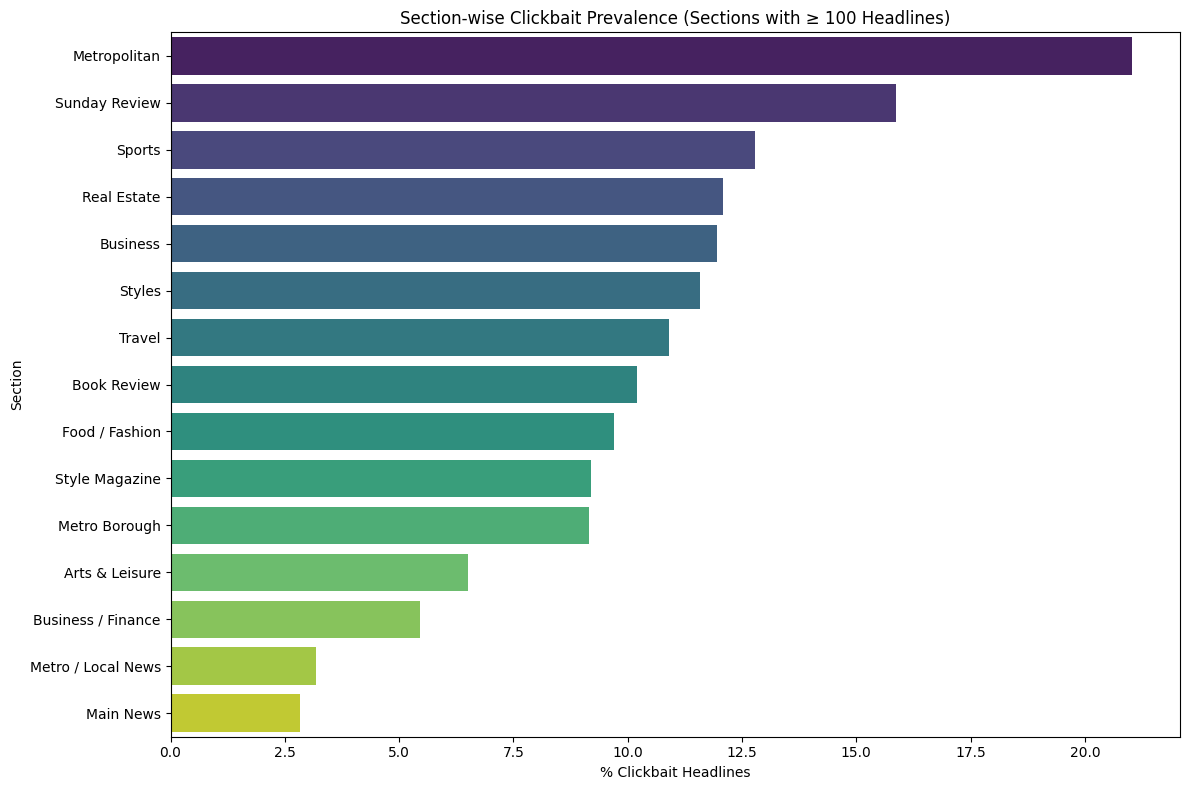

In [9]:
section_counts = df.groupby(['print_section_name', 'clickbait_label']).size().unstack(fill_value=0)
section_counts['Total'] = section_counts['CLICKBAIT'] + section_counts['NOT']
section_counts['% CLICKBAIT'] = (section_counts['CLICKBAIT'] / section_counts['Total']) * 100
section_counts = section_counts.sort_values('% CLICKBAIT', ascending=False)

# Only include sections with at least X total headlines
MIN_HEADLINES = 100

filtered_section_counts = section_counts[section_counts['Total'] >= MIN_HEADLINES]

# Plot again
plt.figure(figsize=(12,8))
sns.barplot(x=filtered_section_counts['% CLICKBAIT'], y=filtered_section_counts.index, palette='viridis')
plt.title(f"Section-wise Clickbait Prevalence (Sections with ≥ {MIN_HEADLINES} Headlines)")
plt.xlabel("% Clickbait Headlines")
plt.ylabel("Section")
plt.tight_layout()
plt.show()

### SECTION TIME SERIES

In [10]:
import pandas as pd

# Convert pub_date to datetime
df['pub_date'] = pd.to_datetime(df['pub_date'], errors='coerce')

# Create year-month column for grouping
df['year_month'] = df['pub_date'].dt.to_period('M')

# Optional: filter sections with enough data
MIN_HEADLINES = 100
valid_sections = df['section_name'].value_counts()
valid_sections = valid_sections[valid_sections >= MIN_HEADLINES].index
df = df[df['section_name'].isin(valid_sections)]


/tmp/ipython-input-10-453677995.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['pub_date'].dt.to_period('M')


/tmp/ipython-input-74-2461896664.py:4: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



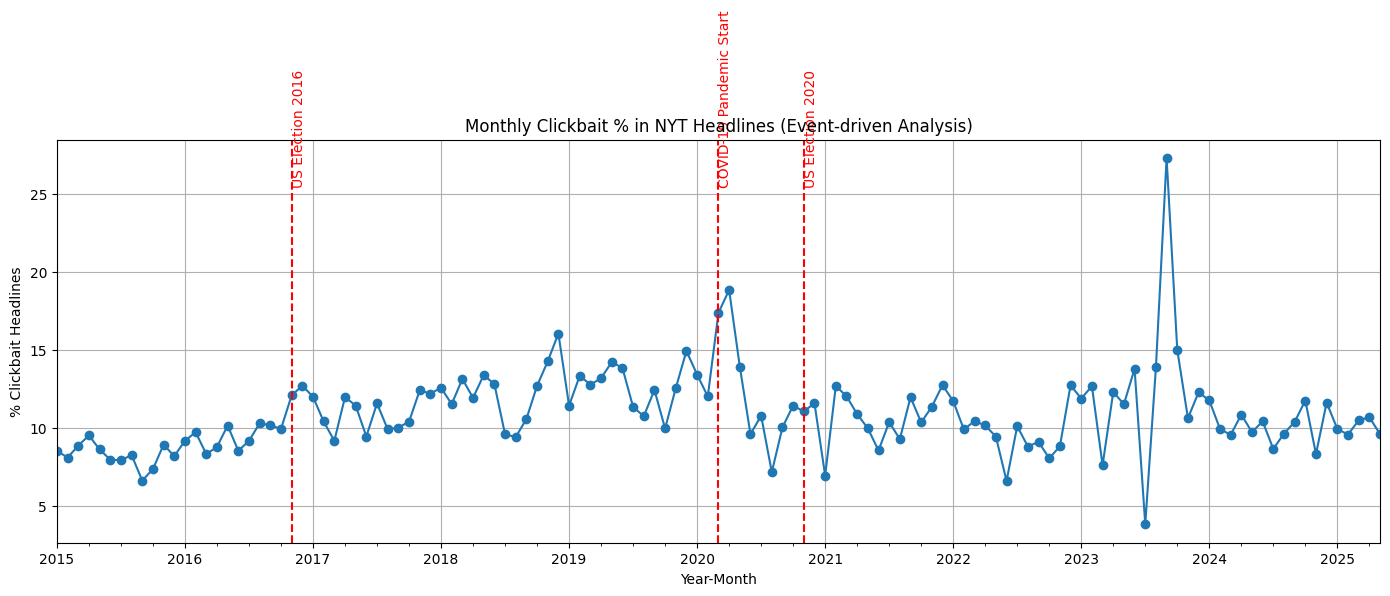

In [ ]:
#RQ 2
# Preprocessing: add year-month column
df['pub_date'] = pd.to_datetime(df['pub_date'])
df['year_month'] = df['pub_date'].dt.to_period('M')

# Monthly clickbait % over time
monthly_counts = df.groupby(['year_month', 'clickbait_label']).size().unstack(fill_value=0)
monthly_counts['Total'] = monthly_counts['CLICKBAIT'] + monthly_counts['NOT']
monthly_counts['% CLICKBAIT'] = (monthly_counts['CLICKBAIT'] / monthly_counts['Total']) * 100

# Plot
plt.figure(figsize=(14,6))
monthly_counts['% CLICKBAIT'].plot(marker='o')
plt.title("Monthly Clickbait % in NYT Headlines (Event-driven Analysis)")
plt.xlabel("Year-Month")
plt.ylabel("% Clickbait Headlines")
plt.grid(True)

# Optional: annotate events
events = {
    '2016-11': 'US Election 2016',
    '2020-03': 'COVID-19 Pandemic Start',
    '2020-11': 'US Election 2020'
}

for date, label in events.items():
    plt.axvline(pd.Period(date), color='red', linestyle='--')
    plt.text(pd.Period(date), plt.ylim()[1]*0.9, label, rotation=90, color='red')

plt.tight_layout()
plt.show()

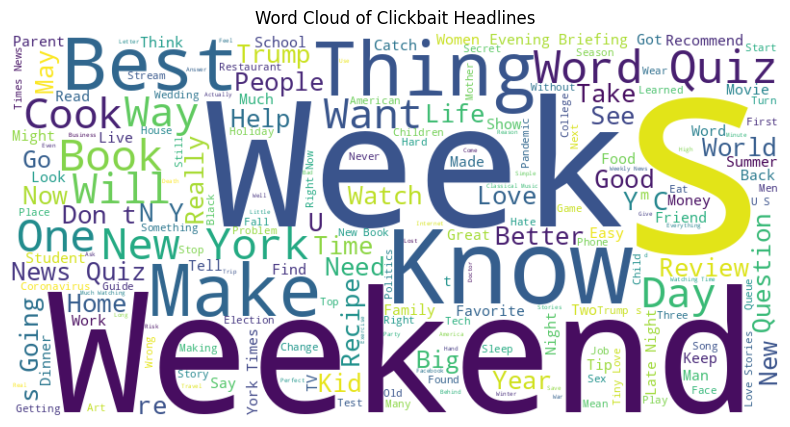

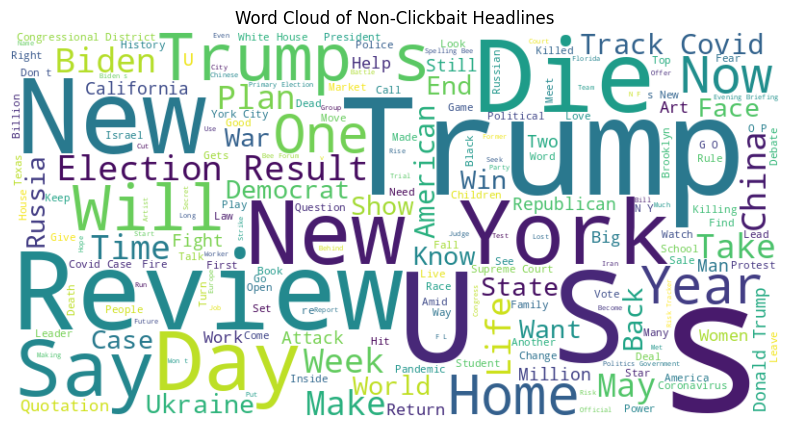

/tmp/ipython-input-11-3117603860.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=bigrams, palette='plasma')


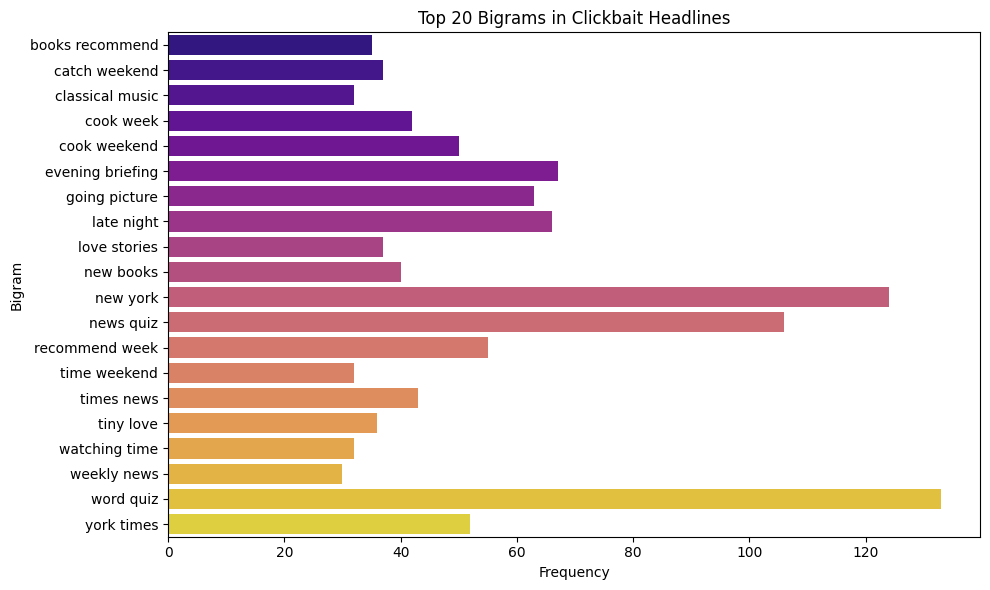

In [11]:
#RQ3

from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

# Separate clickbait and not clickbait headlines
clickbait_texts = df[df['clickbait_label'] == 'CLICKBAIT']['headline_main'].dropna().tolist()
non_clickbait_texts = df[df['clickbait_label'] == 'NOT']['headline_main'].dropna().tolist()

# Function to plot word cloud
def plot_wordcloud(texts, title):
    text_combined = " ".join(texts)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Word clouds
plot_wordcloud(clickbait_texts, "Word Cloud of Clickbait Headlines")
plot_wordcloud(non_clickbait_texts, "Word Cloud of Non-Clickbait Headlines")

# Example: Top bigrams in clickbait headlines
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english', max_features=20)
X = vectorizer.fit_transform(clickbait_texts)
bigrams = vectorizer.get_feature_names_out()
counts = X.sum(axis=0).A1

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=counts, y=bigrams, palette='plasma')
plt.title("Top 20 Bigrams in Clickbait Headlines")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.tight_layout()
plt.show()


In [ ]:
# import requests
# import pandas as pd

# #  Replace with your actual NYT API key
# API_KEY = "c9LEKVfzbLYPqYbqZIJ18M60rEAjf2pA"

# # Choose year and month to fetch
# year = 2024
# month = 6

# # NYT Archive API endpoint
# url = f"https://api.nytimes.com/svc/archive/v1/{year}/{month}.json?api-key={API_KEY}"

# # Fetch and parse JSON
# response = requests.get(url)
# if response.status_code != 200:
#     raise Exception(f"Failed to fetch articles: {response.status_code}")

# data = response.json()
# articles = data["response"]["docs"]

# # Load into DataFrame directly (without normalization)
# df = pd.DataFrame(articles)

# # Show basic info and preview
# print(f"\n Loaded {len(df)} articles for {year}-{month:02d}")
# print("\n DataFrame Info:")
# print(df.info())
# print("\n Sample Rows:")
# print(df.head(2))

## LEAD AND HEADLINES


In [ ]:
# from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
# import pandas as pd
# from tqdm import tqdm

# # Load your data
# df = pd.read_csv('/content/drive/MyDrive/nyt_articles/nyt-2015-2025.csv', low_memory=False)

# # Filter rows with both headline and lead_paragraph
# df = df[df['headline'].notnull() & df['lead_paragraph'].notnull()].copy()

# # Extract headline text (robust to JSON-like dicts)
# import ast
# def extract_headline_main(h):
#     try:
#         return ast.literal_eval(h).get('main', None)
#     except:
#         return h if isinstance(h, str) else None

# df['headline_main'] = df['headline'].apply(extract_headline_main)
# df = df[df['headline_main'].notnull()]

# # Combine fields
# df['combined_text'] = df['headline_main'] + " " + df['lead_paragraph']

# # Load model
# model_name = "Stremie/xlm-roberta-base-clickbait"
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModelForSequenceClassification.from_pretrained(model_name)
# clickbait_pipe = pipeline("text-classification", model=model, tokenizer=tokenizer, truncation=True, device=0)

# # Initialize new columns
# df['clickbait_label'] = pd.Series(dtype='object')
# df['clickbait_score'] = pd.Series(dtype='float64')

# # Batch prediction
# batch_size = 32
# results = []
# texts = df['combined_text'].tolist()

# for i in tqdm(range(0, len(texts), batch_size)):
#     batch = texts[i:i+batch_size]
#     preds = clickbait_pipe(batch)
#     results.extend(preds)

# # Assign results
# df['clickbait_label'] = [r['label'] for r in results]
# df['clickbait_score'] = [r['score'] for r in results]

# # Save updated version
# df.to_csv('/content/drive/MyDrive/nyt_articles/nyt_clickbait_headline_lead.csv', index=False)
# print("Done. Predictions saved with clickbait_label and score.")


In [ ]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/nyt_articles/nyt_clickbait_headline_lead.csv', dtype={'print_section': str})


/tmp/ipython-input-3-1778016489.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/nyt_articles/nyt_clickbait_headline_lead.csv', dtype={'print_section': str})


In [ ]:
df['clickbait_label'] = df['clickbait_label'].map({'LABEL_0': 'NOT', 'LABEL_1': 'CLICKBAIT'})


In [ ]:
df.to_csv('/content/drive/MyDrive/nyt_articles/nyt_clickbait_headline_lead-labelmodified.csv', index=False)

In [ ]:
print(df['clickbait_label'].value_counts(normalize=True))
print(df[['clickbait_label', 'clickbait_score']].groupby('clickbait_label').mean())


clickbait_label
NOT          0.89315
CLICKBAIT    0.10685
Name: proportion, dtype: float64
                 clickbait_score
clickbait_label                 
CLICKBAIT               0.744840
NOT                     0.912299


/tmp/ipython-input-7-1772607147.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['pub_date'].dt.to_period('M')


<Axes: title={'center': '% Clickbait Headlines Over Time'}, xlabel='year_month'>

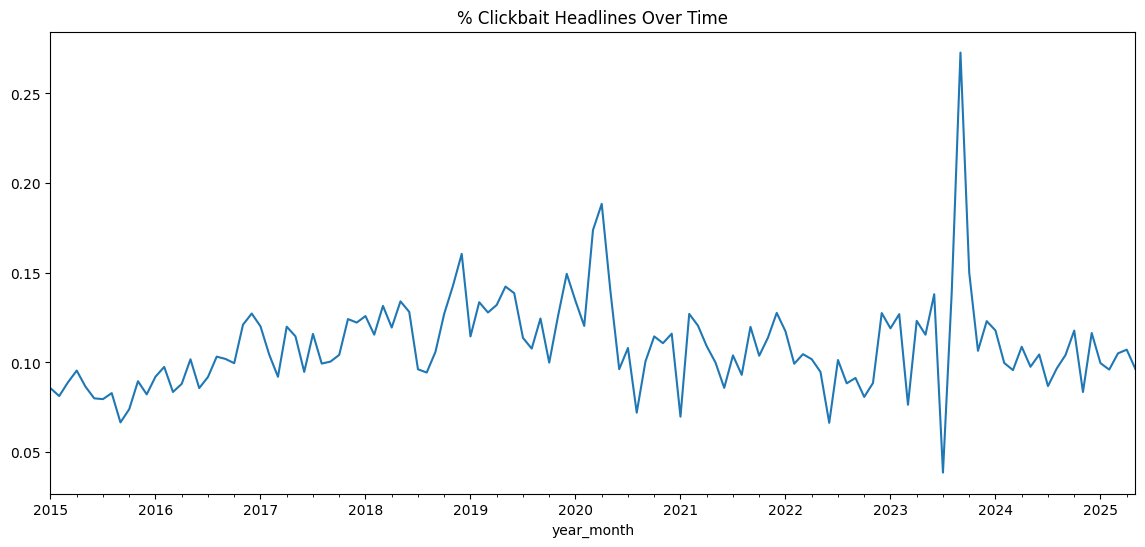

In [ ]:
df['pub_date'] = pd.to_datetime(df['pub_date'], errors='coerce')
df['year_month'] = df['pub_date'].dt.to_period('M')

monthly_clickbait = df.groupby('year_month')['clickbait_label'].value_counts(normalize=True).unstack().fillna(0)

monthly_clickbait['CLICKBAIT'].plot(figsize=(14,6), title="% Clickbait Headlines Over Time")


In [ ]:
df_filtered = df[df['headline_main'].notnull() & df['lead_paragraph'].notnull()].copy()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Fit vectorizer on headline + lead for vocabulary consistency
vectorizer = TfidfVectorizer(stop_words='english')

# Optional: truncate for speed (if large)
df_sample = df_filtered.sample(n=1000, random_state=42)

# df_sample = df_filtered

# Fit on the full corpus of both parts
X = vectorizer.fit_transform(df_sample['headline_main'] + " ||| " + df_sample['lead_paragraph'])

# Separate headline and lead vectors
headline_vecs = vectorizer.transform(df_sample['headline_main'])
lead_vecs = vectorizer.transform(df_sample['lead_paragraph'])

# Compute cosine similarity
from numpy import diagonal
df_sample['headline_lead_similarity'] = diagonal(cosine_similarity(headline_vecs, lead_vecs))

# View
print(df_sample[['headline_main', 'lead_paragraph', 'clickbait_label', 'headline_lead_similarity']].head())


                                            headline_main  \
46759   Los Angeles Deputy Who Faked Sniper-Style Atta...   
103638              On the Trail of the Los Angeles Fires   
75459                The Anguish of Afghans in Sacramento   
68153   The Supreme Court Upheld Trump’s Muslim Ban. L...   
77916   ‘Jazz Fest: A New Orleans Story’ Review: An Ev...   

                                           lead_paragraph clickbait_label  \
46759   A young Los Angeles County sheriff’s deputy wa...             NOT   
103638  The Palisades fire and the Eaton fire erupted ...             NOT   
75459   From the moment he arrived in the Bay Area fro...             NOT   
68153   One of President Biden’s first acts, the repea...             NOT   
77916   As has been demonstrated in films as wide-rang...             NOT   

        headline_lead_similarity  
46759                   0.217720  
103638                  0.322787  
75459                   0.000000  
68153                   0.4465

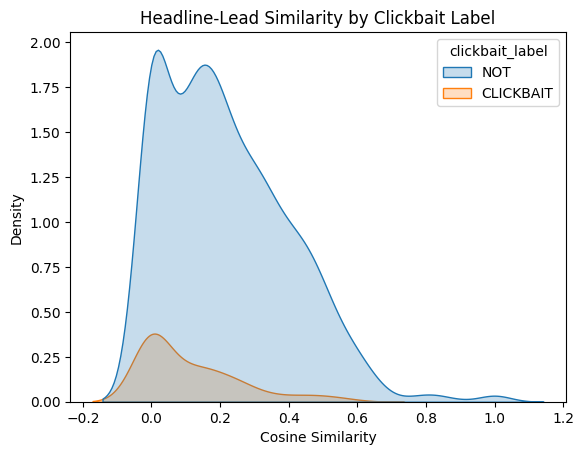

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data=df_sample, x='headline_lead_similarity', hue='clickbait_label', fill=True)
plt.title("Headline-Lead Similarity by Clickbait Label")
plt.xlabel("Cosine Similarity")
plt.show()


In [ ]:
print(df_sample.groupby('clickbait_label')['headline_lead_similarity'].describe())


                 count      mean       std  min       25%       50%       75%  \
clickbait_label                                                                 
CLICKBAIT        102.0  0.113036  0.144361  0.0  0.000000  0.068927  0.186179   
NOT              898.0  0.217604  0.185324  0.0  0.067891  0.184386  0.341645   

                      max  
clickbait_label            
CLICKBAIT        0.564672  
NOT              1.000000  


## COMPOSITE SCORE ANALYSIS (INGORE)

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from textblob import TextBlob


df = pd.read_csv('/content/drive/MyDrive/nyt_articles/nyt_clickbait_labeled_full.csv', low_memory=False)
df = df[df['headline_main'].notnull() & df['lead_paragraph'].notnull() & df['clickbait_score'].notnull()].copy()

# Optional: sample subset for speed
# df = df.sample(1000, random_state=42)

# --- 2. Compute TF-IDF similarity between headline and lead ---
vectorizer = TfidfVectorizer(stop_words='english')
vectorizer.fit(df['headline_main'] + " " + df['lead_paragraph'])

headline_vecs = vectorizer.transform(df['headline_main'])
lead_vecs = vectorizer.transform(df['lead_paragraph'])

df['headline_lead_similarity'] = [
    cosine_similarity(headline_vecs[i], lead_vecs[i])[0][0] for i in range(len(df))
]

# --- 3. Hyperbole Count ---
# hyperbole_words = {"shocking", "unbelievable", "secret", "revealed", "insane", "epic", "crazy", "must-see"}
# df['hyperbole_count'] = df['headline_main'].fillna("").apply(
#     lambda x: sum(word in x.lower() for word in hyperbole_words)
# )
import pandas as pd

# Load and filter relevant emotions (surprise, fear, anticipation)
nrc_df = pd.read_csv("/content/drive/MyDrive/nyt_articles/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt", sep='\t', names=['word', 'emotion', 'value'])

# Filter to only words tagged with value=1 for desired emotions
target_emotions = {'surprise', 'fear', 'anticipation', 'anger', 'joy', 'sadness'} # identify exaggerated, emotionally charged words that are commonly found in clickbait
filtered = nrc_df[(nrc_df['emotion'].isin(target_emotions)) & (nrc_df['value'] == 1)]

# Get unique words associated with those emotions
nrc_hyperbole_words = set(filtered['word'].unique())

def count_nrc_hyperbole(text):
    return sum(word.lower() in nrc_hyperbole_words for word in text.split())

df['hyperbole_count'] = df['headline_main'].fillna("").apply(count_nrc_hyperbole)


# --- 4. Subjectivity ---
df['subjectivity'] = df['headline_main'].fillna("").apply(lambda x: TextBlob(x).sentiment.subjectivity)

# --- 5. Headline format flags ---
df['is_question'] = df['headline_main'].str.strip().str.endswith('?')
df['is_listicle'] = df['headline_main'].str.contains(
    r'\b\d+\s+(ways|things|signs|reasons|secrets|facts)\b', case=False, na=False
)

# --- 6. Invert similarity (lower = more clickbaity) ---
df['inverse_similarity'] = 1 - df['headline_lead_similarity']

# --- 7. Normalize features ---
scaler = MinMaxScaler()
df[['clickbait_score', 'inverse_similarity', 'hyperbole_count', 'subjectivity']] = scaler.fit_transform(
    df[['clickbait_score', 'inverse_similarity', 'hyperbole_count', 'subjectivity']]
)


# --- 8. Composite Score ---
# Apply conditional logic to set the clickbait_score to 0 if label is 'NOT'
# df['composite_clickbait_score'] = df.apply(
#     lambda row: (
#         0.3 * 0 +  # Set clickbait_score to 0 if label is 'NOT'
#         0.2 * row['inverse_similarity'] +
#         0.2 * row['hyperbole_count'] +
#         0.2 * row['subjectivity'] +
#         0.05 * int(row['is_question']) +  # Convert boolean to int (True=1, False=0)
#         0.05 * int(row['is_listicle'])    # Convert boolean to int (True=1, False=0)
#     ) if row['clickbait_label'] == 'NOT' else (
#         0.3 * row['clickbait_score'] +
#         0.2 * row['inverse_similarity'] +
#         0.2 * row['hyperbole_count'] +
#         0.2 * row['subjectivity'] +
#         0.05 * int(row['is_question']) +  # Convert boolean to int (True=1, False=0)
#         0.05 * int(row['is_listicle'])    # Convert boolean to int (True=1, False=0)
#     ), axis=1
# )


df['composite_clickbait_score'] = (
    # 0.3 * df['clickbait_score'] +
    0.3 * df['inverse_similarity'] +
    0.3 * df['hyperbole_count'] +
    0.3 * df['subjectivity'] +
    0.05 * df['is_question'].astype(float) +
    0.05 * df['is_listicle'].astype(float)
)


# --- 9. Composite Label ---
df['composite_label'] = df['composite_clickbait_score'].apply(lambda x: 'CLICKBAIT' if x > 0.6 else 'NOT')

# --- 10. Results preview ---
print(df[['headline_main', 'composite_clickbait_score', 'composite_label']].head())

# Optional: Save results
df.to_csv('/content/drive/MyDrive/nyt_articles/nyt_composite_clickbait-withoutmodel.csv', index=False)


/tmp/ipython-input-12-3354434171.py:55: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['is_listicle'] = df['headline_main'].str.contains(


                                       headline_main  \
0           Mike Huckabee Announces Presidential Run   
1  Starbucks Profit Jumps 22%; Chief Cites Increa...   
2                              What’s on TV Thursday   
3             Making Mac and Cheese Without a Recipe   
4  Investors Find Ways to Indirectly Profit From ...   

   composite_clickbait_score composite_label  
0                   0.193113             NOT  
1                   0.268573             NOT  
2                   0.300000             NOT  
3                   0.220171             NOT  
4                   0.291157             NOT  


In [ ]:
df_composite_no_modelscore = pd.read_csv('/content/drive/MyDrive/nyt_articles/nyt_composite_clickbait-withoutmodel.csv')

/tmp/ipython-input-13-1638650405.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_composite_no_modelscore = pd.read_csv('/content/drive/MyDrive/nyt_articles/nyt_composite_clickbait-withoutmodel.csv')


In [ ]:
# Count values
label_counts = df_composite_no_modelscore['composite_label'].value_counts(dropna=False)

# Print results
print("Total counts based on composite_label:")
print(label_counts)

Total counts based on composite_label:
composite_label
NOT          106585
CLICKBAIT      2697
Name: count, dtype: int64


In [ ]:
df_composite = pd.read_csv('/content/drive/MyDrive/nyt_articles/nyt_composite_clickbait.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/nyt_articles/nyt_composite_clickbait.csv'

In [ ]:
# Count values
label_counts = df['composite_label'].value_counts(dropna=False)

# Print results
print("Total counts based on composite_label:")
print(label_counts)

In [ ]:
# Count values
label_counts = df['clickbait_label'].value_counts(dropna=False)

# Print results
print("Total counts based on composite_label:")
print(label_counts)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=df_composite, x='composite_clickbait_score', hue='composite_label', bins=30, kde=True, palette='Set2')
plt.title("Composite Clickbait Score Distribution")
plt.xlabel("Composite Clickbait Score")
plt.ylabel("Article Count")
plt.tight_layout()
plt.show()


In [ ]:
df_composite['pub_date'] = pd.to_datetime(df_composite['pub_date'], errors='coerce')
df_composite['year_month'] = df_composite['pub_date'].dt.to_period('M')

monthly_scores = df_composite.groupby('year_month')['composite_clickbait_score'].mean()

plt.figure(figsize=(14, 6))
monthly_scores.plot(marker='o')
plt.title("Average Composite Clickbait Score Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Avg. Score")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
top_sections = df_composite['section_name'].value_counts().head(10).index
section_df = df_composite[df_composite['section_name'].isin(top_sections)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=section_df, x='section_name', y='composite_clickbait_score')
plt.xticks(rotation=45)
plt.title("Composite Clickbait Score by News Section")
plt.xlabel("Section")
plt.ylabel("Clickbait Score")
plt.tight_layout()
plt.show()


## COMPARING MODEL DETECTION VS NUMERICALLY COMPUTED COSINE SIMILARITY

In [ ]:
df_sample= df_composite.sample(n=3000, random_state=42)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='headline_lead_similarity',
    y='clickbait_score',
    hue='clickbait_label',
    data=df_sample,
    alpha=0.6,
    palette='Set1'
)
plt.title("Scatter: Headline-Content Similarity vs. Clickbait Score")
plt.xlabel("Cosine Similarity (Headline vs Lead)")
plt.ylabel("Model Clickbait Score")
plt.grid(True)
plt.tight_layout()
plt.show()
